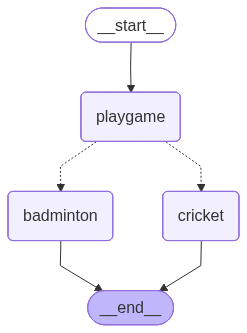

In [6]:
from typing_extensions import TypedDict
from typing import Literal
import random
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

class TypedDictState(TypedDict):
    name: str
    game: Literal["cricket", "badminton"]

def playgame(state: TypedDictState):
    print(f"{state['name']} is playing {state['game']}")

def cricket(state: TypedDictState):
    state['game'] = "cricket"
    print("cricket node has been called")
    
def badminton(state: TypedDictState):
    state['game'] = "badminton"
    print("badminton node has been called")

def decide_play(state: TypedDictState) -> Literal["cricket", "badminton"]:
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"

builder = StateGraph(TypedDictState)
builder.add_node("playgame", playgame)
builder.add_node("cricket", cricket)
builder.add_node("badminton", badminton)

builder.add_edge(START, "playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)
# Add
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))